In [14]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [18]:
def plot_degree_distribution(values):
    plt.figure(figsize = (12, 8))
    values.plot(kind = 'hist')
    plt.yscale('log')
    plt.xlabel('Node degree')
    plt.show()

    
def analysis(g):
    print(f'Number of nodes: {g.number_of_nodes()}')
    print(f'Number of edges: {g.number_of_edges()}')
    degrees = g.degree()
    degrees = pd.DataFrame(degrees, columns = ['Name', 'Degree'])
    print(f"Mean of degree distribution: {degrees['Degree'].mean()}")
    print(f"Variance of degree distribution: {degrees['Degree'].std()}")
    plot_degree_distribution(degrees['Degree'])


# Erdos Renyi Graph (Random Graph)

In [26]:
g = nx.erdos_renyi_graph(2000, 0.2)

Number of nodes: 2000
Number of edges: 398995
Mean of degree distribution: 398.995
Variance of degree distribution: 17.728511642620507


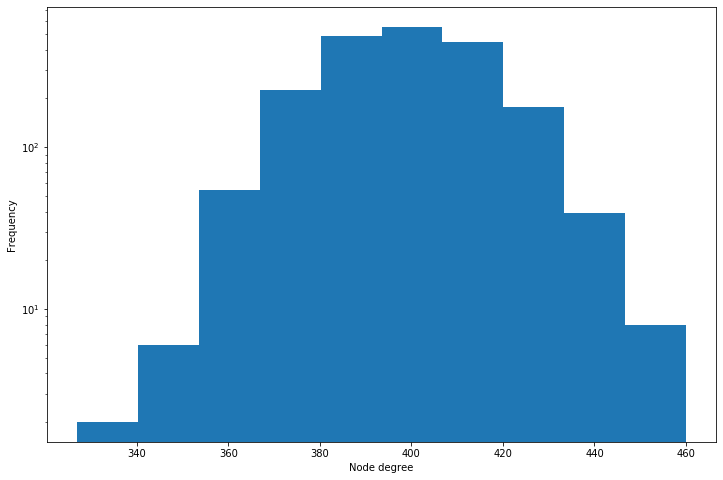

In [27]:
analysis(g)

# Barabasi Albert Graph

In [28]:
g = nx.barabasi_albert_graph(2000, 5)

Number of nodes: 2000
Number of edges: 9975
Mean of degree distribution: 9.975
Variance of degree distribution: 10.650685121003665


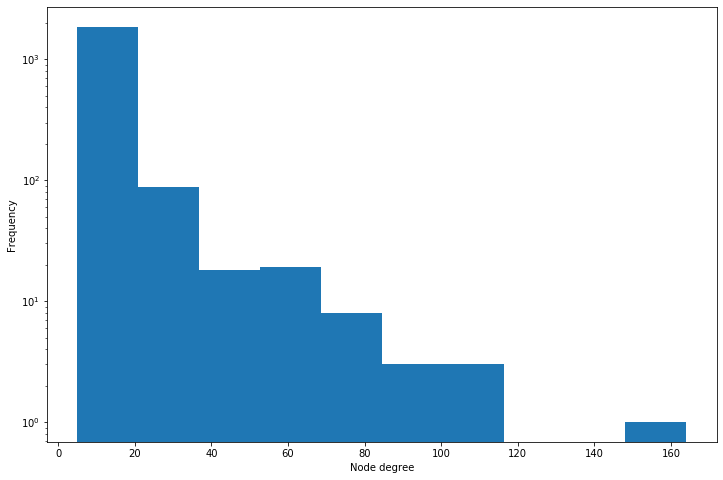

In [29]:
analysis(g)

# Watts Strogratz Graph

In [30]:
g = nx.watts_strogatz_graph(2000, 20, 0.2)

Number of nodes: 2000
Number of edges: 20000
Mean of degree distribution: 20.0
Variance of degree distribution: 1.8326700029382907


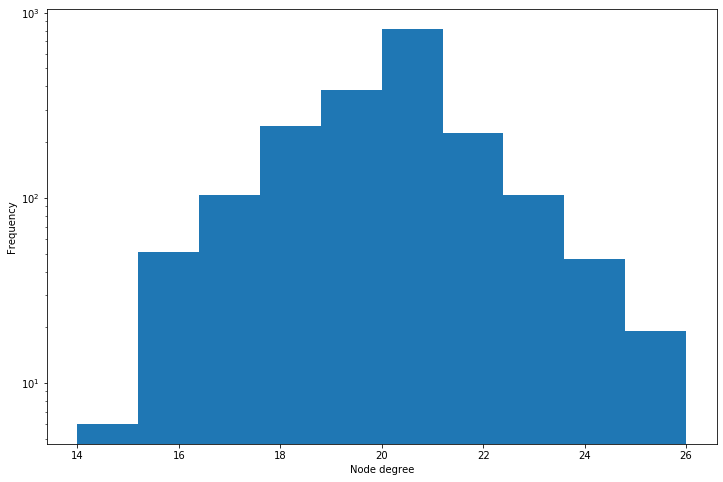

In [31]:
analysis(g)